## Quiz 2 Part 2: Model Report 

As budding Data Scientists, one of the tasks that you have to do after building you model is to create a model report. The model report acts as a documentation to understand the analytic approach that was done in order to solve a problem. This documentation is important since it allows your colleagues to review and critic your approach.  

The following are the different sections of the model report:
- Summary - This contains a high level description of the approach done to solve the problem along with the results and findings of your study. 
- Data Preprocessing - This section contains a short description and shows the code on how the data was processed to prep it for modeling
- Model Development - This section contains a short description and the code as to how the model was developed 
- Results/Model Performance - This section contains a summary of the different algorithms used and metrics that was achieved in the model development phase 
- Model Interpretability - This section discusses the important features used by the model and insights on the top features. Model here will be the model recommended by the data scientist that business will use. 
- Recommendation - This section details the next steps and improvements that can be done 

You are applying for a Data Scientist position at Keebs Loan. You have been asked to create a draft model report which contains the different sections mentioned and will be evalulated based on the rubric placed in Canvas. The interviewer has also placed an additional constraint, **you are not allowed to use KNN or Logistic Regression for the report and have been requested to impute missing values instead of dropping them.**

## Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from numpy.testing import assert_almost_equal
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
pip install shap

  Using cached shap-0.41.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (572 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.55.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.4 MB)
  Using cached cloudpickle-2.1.0-py3-none-any.whl (25 kB)
  Using cached llvmlite-0.38.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


## Dataset 

You are to build a classification model that determines whether a loan for building a home will be approved or not. The following are the features of the dataset:

1.LoanID= Unique Loan ID <br>
2.Gender= Male/ Female <br>
3.Married= Applicant married (Y/N) <br>
4.Dependents= Number of dependents <br>
5.Education= Applicant Education (Graduate/ Under Graduate) <br>
6.SelfEmployed= Self-employed (Y/N) <br>
7.ApplicantIncome= Applicant income <br>
8.CoapplicantIncome= Coapplicant income <br>
9.LoanAmount= Loan amount in thousands <br>
10.LoanAmountTerm= Term of the loan in months <br>
11.CreditHistory= Credit history meets guidelines <br>
12.PropertyArea= Urban/ Semi-Urban/ Rural <br>
13.LoanStatus= **(Target)** Loan approved (Y/N) <br>


In [3]:
import pandas as pd 

In [4]:
data_df = pd.read_csv("data/loan_approval.csv")
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## <span style="color:blue">Summary</span>
<hr>

``Data preprocessing was done to accomplish data cleaning and imputation. The algorithms were optimized in the model development. The highlighted algorithms are SVM and Bagging with Random Forest. Finally, SHAP was used to highlight the top features that drove the approval of loan. It was found that having a credit history deems to provide more availability of having a loan even if there are less co-applicant income per loan. Also if the loan amount is lesser it is deemed to be approved. The top three features were Credit History, Co-applicant Income, and the Loan Amount.``

## <span style="color:blue">Data Preprocessing</span>
<hr>

``The data preprocessing required both data imputation and feature selection before it was utilized in the algorithms in the model development.``

In [8]:
columns_with_null = data_df.columns[data_df.isna().any()]
display((data_df[columns_with_null].isnull().sum()/data_df.shape[0])*100)
display(data_df[columns_with_null])
for c in columns_with_null:
    print(f"{c} {data_df[c].unique()}")

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Self_Employed ['No' 'Yes' nan]
LoanAmount [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 23

#### Missing Data Imputation

``Since Gender, Married, Dependents, and Self-employed are all necessary data, data imputation by means of forecasting or applying mean, median, and mode are no longer required because these could be missing data not at random. Thus, we can protect these data by masking or replacing them with 'unknown' and we respect the internal arrangements done for these missing data not at random``

``However for the LoanAmount, Loan_Amount_Term, and Credit_History, they will follow the mean value imputation. These will not have a negligible effect in the overall analysis as less than 10% are observed for null value. The results, however, should be justified that it initially had imputed null values, and that the results serves as a mere forecast or prediction``

In [9]:
data_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
columns_with_null

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [11]:
for c in columns_with_null:
    if c == 'LoanAmount' or c == 'Loan_Amount_Term':
        continue
    data_df[c] = data_df[c].fillna('unknown')

In [12]:
numeric_data = columns_with_null[4:6]
numeric_data

Index(['LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [13]:
for n in numeric_data:
    data_df[n] = data_df[n].fillna(round(data_df[n].mean(), 1))

In [14]:
data_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


``Since Loan_Status is the target feature, the Y will be turned into 1 while N to 0. This will be done before the OneHotEncoding.``

In [16]:
data_df["Loan_Status"] = data_df["Loan_Status"].str.replace("Y", "1")
data_df["Loan_Status"] = data_df["Loan_Status"].str.replace("N", "0")
data_df["Loan_Status"] = data_df["Loan_Status"].astype(str).astype(int)

``The Loan_ID can also be dropped as this will not be necessary for the analysis. Moreover, since dependents are in a ratio scale this will be turned into a nominal scale to satisfy the categorical feature requirements. Therefore, 0 will be 'No' and greater than or equal to 1 will be 'Yes'. Credit history can also be turned to Yes or No.``

In [17]:
data_df["Dependents"] = data_df["Dependents"].str.replace("3\+", "Yes", regex=True)
data_df["Dependents"] = data_df["Dependents"].str.replace("2", "Yes")
data_df["Dependents"] = data_df["Dependents"].str.replace("1", "Yes")
data_df["Dependents"] = data_df["Dependents"].str.replace("0", "No")

In [18]:
data_df["Credit_History"] = data_df["Credit_History"].replace([1], "Yes")
data_df["Credit_History"] = data_df["Credit_History"].replace([0], "No")

In [19]:
data_df.to_csv('data/preprocessed_loan_approval.csv')

In [20]:
data_df.drop("Loan_ID", inplace=True, axis=1)
features = data_df.columns

In [21]:
features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(data_df[categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

data_df.drop(categorical_features, axis=1, inplace=True)
data_df = pd.concat([data_df, res_df], axis=1)

data_df.head()

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,x0_Female,x0_Male,x0_unknown,x1_No,x1_Yes,...,x3_Not Graduate,x4_No,x4_Yes,x4_unknown,x5_No,x5_Yes,x5_unknown,x6_Rural,x6_Semiurban,x6_Urban
0,5849,0.0,146.4,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.0,360.0,0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.0,360.0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.0,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
data_df.to_csv('data/encoded_loan_approval.csv')

In [25]:
X = data_df.drop(labels=['Loan_Status'], axis=1)
y = data_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train ", X_train.shape)
print("Test ", X_test.shape)

Train  (491, 24)
Test  (123, 24)


``Logistic regression for the feauture selection via recursive feature imputation was accomplished for the preprocessing``

In [26]:
estimator = LogisticRegression(solver='saga', max_iter=20000)

In [27]:
rfecv = RFECV(estimator=estimator, scoring='accuracy', min_features_to_select=5, n_jobs=-1)
rfecv.fit(X, y)

RFECV(estimator=LogisticRegression(max_iter=20000, solver='saga'),
      min_features_to_select=5, n_jobs=-1, scoring='accuracy')

In [28]:
rfecv.grid_scores_

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.69105691, 0.68292683, 0.68292683, 0.67479675, 0.81967213],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.81967213],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.81967213],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.81967213],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.81967213],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.81147541],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.80327869],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68032787],
       [0.69105691, 0.69105691, 0.

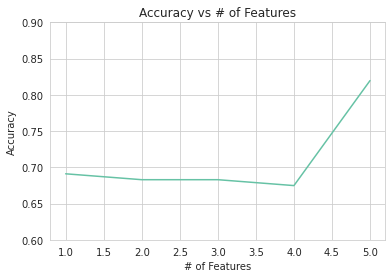

In [29]:
ax = sns.lineplot(x=list(range(1, len(rfecv.grid_scores_[0])+1)), y=list(rfecv.grid_scores_[0]))
ax.set_title("Accuracy vs # of Features")
ax.set_xlabel("# of Features")
ax.set_ylabel("Accuracy")
ax.set_ylim(.6, .9)
sns.set(rc={'figure.figsize':(10,5)})

In [30]:
temp_df = pd.DataFrame() 
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
temp_df = temp_df.sort_values("rank")

In [31]:
temp_df

,feature,rank
1,CoapplicantIncome,1
2,LoanAmount,1
3,Loan_Amount_Term,1
19,x5_Yes,1
18,x5_No,1
22,x6_Semiurban,1
8,x1_Yes,2
13,x3_Graduate,3
5,x0_Male,4
21,x6_Rural,5


## <span style="color:blue">Model Development</span>
<hr>

``Both SVM and Bagging (Random Forest) algorithms are utilized and are developed using the parameter grid with the use of grid search algorithm. The important features are also highlighted in this section. ``

In [32]:
X = data_df[temp_df['feature'][:5]]
y = data_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train ", X_train.shape)
print("Test ", X_test.shape)

Train  (491, 5)
Test  (123, 5)


In [33]:
param_grid = {
    'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100],
    'kernel': ['rbf']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
}

clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorers, cv=5, refit='precision_score', verbose = 3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 2/5] END C=0.1, gamma=1, kernel=rbf; accuracy_score: (test=0.694) f1: (test=0.819) precision_score: (test=0.694) recall_score: (test=1.000) total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf; accuracy_score: (test=0.687) f1: (test=0.814) precision_score: (test=0.687) recall_score: (test=1.000) total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.684) recall_score: (test=1.000) total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.684) recall_score: (test=1.000) total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.01, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.684) recall_score: (test=1.000) total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=rbf; accuracy_score: (test=0.694) f1: (test=0.819) precision_score: (test=

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100],
                         'kernel': ['rbf']},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=3)

In [34]:
y_pred = clf_grid.best_estimator_.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7346938775510204
0.8470588235294118
0.7868852459016393
0.6829268292682927


In [35]:
res_df = pd.DataFrame(clf_grid.cv_results_)

Text(0.5, 1.0, 'Average Accuracy Score vs C Parameter')

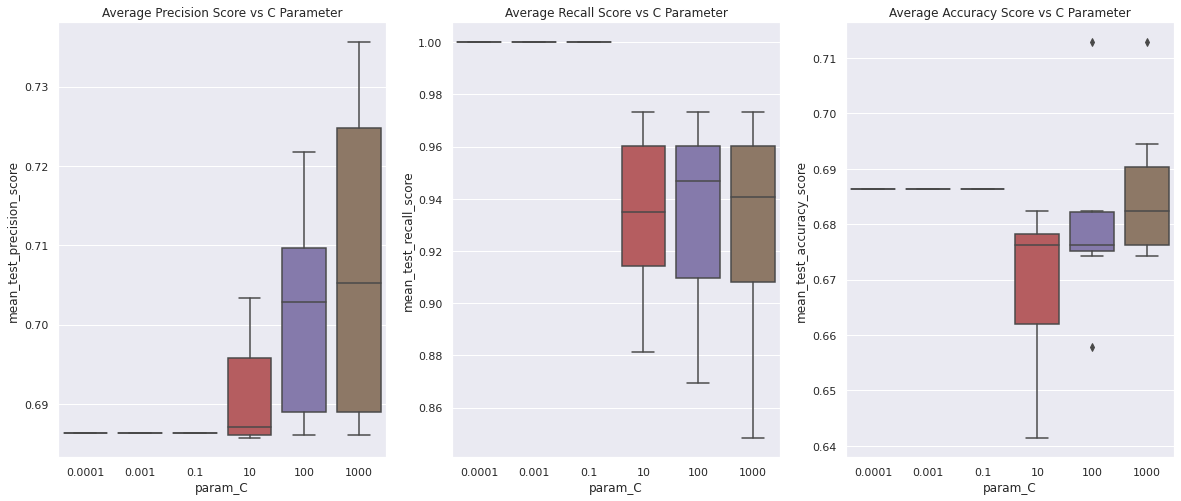

In [36]:
fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=3)

sns.boxplot(data=res_df, x="param_C", y="mean_test_precision_score", ax=axes[0])
axes[0].set_title('Average Precision Score vs C Parameter')

sns.boxplot(data=res_df, x="param_C", y="mean_test_recall_score", ax=axes[1])
axes[1].set_title('Average Recall Score vs C Parameter')

sns.boxplot(data=res_df, x="param_C", y="mean_test_accuracy_score", ax=axes[2])
axes[2].set_title('Average Accuracy Score vs C Parameter')

Text(0.5, 1.0, 'Average Accuracy Score vs Gamma Parameter')

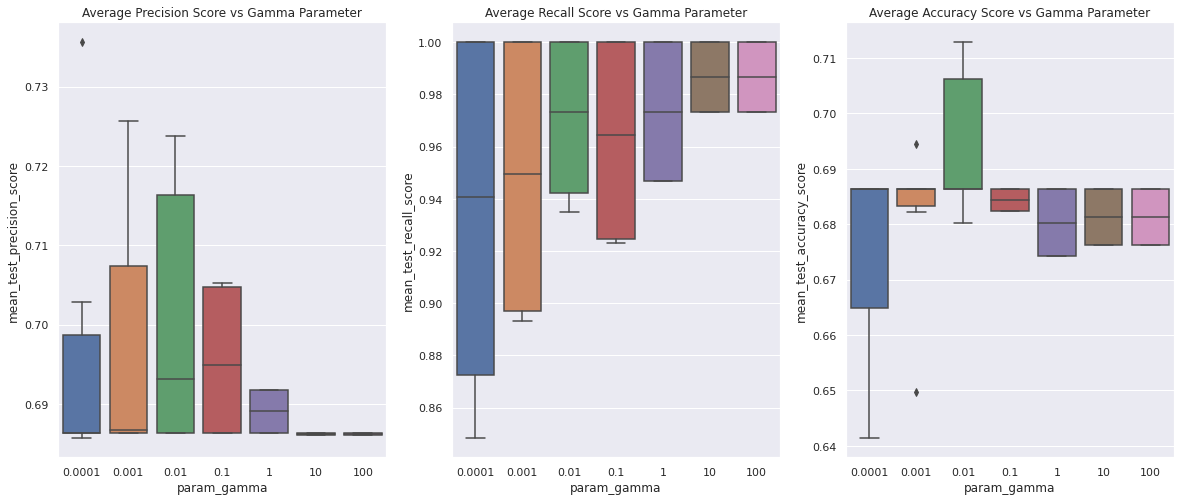

In [37]:
fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=3)

sns.boxplot(data=res_df, x="param_gamma", y="mean_test_precision_score", ax=axes[0])
axes[0].set_title('Average Precision Score vs Gamma Parameter')

sns.boxplot(data=res_df, x="param_gamma", y="mean_test_recall_score", ax=axes[1])
axes[1].set_title('Average Recall Score vs Gamma Parameter')

sns.boxplot(data=res_df, x="param_gamma", y="mean_test_accuracy_score", ax=axes[2])
axes[2].set_title('Average Accuracy Score vs Gamma Parameter')

In [38]:
clf_grid.best_estimator_

SVC(C=1000, gamma=0.0001)

``Using the best estimator from the GridSearchCV we will be able to highlight the feature importance from this algorithm using RFECV again but this time using SVC as the estimator. Since the SVC algorithm does not have feature importance embedded in its algorithm.``

In [39]:
estimator = SVC(kernel="linear", C = 1000, gamma = 0.0001)

In [40]:
rfecv = RFECV(estimator=estimator, scoring='accuracy', min_features_to_select=5)
rfecv.fit(X, y)

[CV 2/5] END C=100, gamma=100, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.691) recall_score: (test=0.985) total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.789) precision_score: (test=0.734) recall_score: (test=0.853) total time=   0.9s
[CV 4/5] END C=1000, gamma=0.0001, kernel=rbf; accuracy_score: (test=0.653) f1: (test=0.764) precision_score: (test=0.714) recall_score: (test=0.821) total time=   0.3s
[CV 1/5] END C=1000, gamma=10, kernel=rbf; accuracy_score: (test=0.636) f1: (test=0.778) precision_score: (test=0.670) recall_score: (test=0.926) total time=   0.0s
[CV 3/5] END C=1000, gamma=10, kernel=rbf; accuracy_score: (test=0.704) f1: (test=0.822) precision_score: (test=0.698) recall_score: (test=1.000) total time=   0.0s
[CV 5/5] END C=1000, gamma=10, kernel=rbf; accuracy_score: (test=0.684) f1: (test=0.807) precision_score: (test=0.691) recall_score: (test=0.970) total time=   0.0s
[C

RFECV(estimator=SVC(C=1000, gamma=0.0001, kernel='linear'),
      min_features_to_select=5, scoring='accuracy')

In [41]:
rfecv.grid_scores_

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.82113821, 0.76422764, 0.7804878 , 0.82926829, 0.81147541]])

In [42]:
X_train.columns[rfecv.support_]

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'x5_Yes',
       'x5_No'],
      dtype='object')

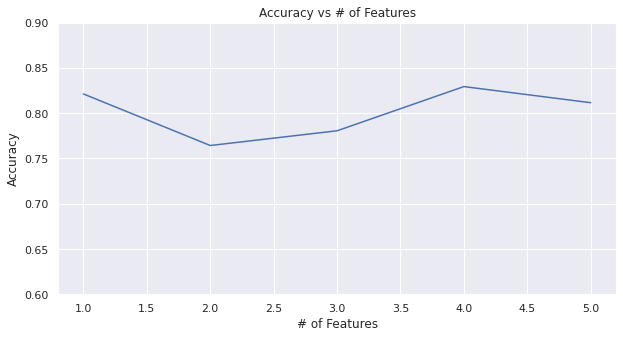

In [43]:
ax = sns.lineplot(x=list(range(1, len(rfecv.grid_scores_[0])+1)), y=list(rfecv.grid_scores_[0]))
ax.set_title("Accuracy vs # of Features")
ax.set_xlabel("# of Features")
ax.set_ylabel("Accuracy")
ax.set_ylim(.6, .9)
sns.set(rc={'figure.figsize':(10,5)})

In [44]:
temp_df = pd.DataFrame() 
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
temp_df = temp_df.sort_values("rank")

In [45]:
temp_df

,feature,rank
0,CoapplicantIncome,1
1,LoanAmount,1
2,Loan_Amount_Term,1
3,x5_Yes,1
4,x5_No,1


In [46]:
param_grid = {
    "n_estimators": range(100, 150, 10),
    "max_depth": range(5,25,5),
    "min_samples_split": np.arange(.1,.6,.1),
    "min_samples_leaf": np.arange(.1,.6,.1),
    "max_features": np.arange(0.1, 0.6, .1)
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
}

clf = RandomForestClassifier()
clf_grid = GridSearchCV(clf, param_grid, scoring=scorers, cv=5, refit='precision_score', verbose = 3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5] END max_depth=5, max_features=0.1, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100; accuracy_score: (test=0.687) f1: (test=0.814) precision_score: (test=0.687) recall_score: (test=1.000) total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.1, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.684) recall_score: (test=1.000) total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.1, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=110; accuracy_score: (test=0.684) f1: (test=0.812) precision_score: (test=0.684) recall_score: (test=1.000) total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.1, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=120; accuracy_score: (test=0.694) f1: (test=0.819) precision_score: (test=0.694) recall_score: (test=1.000) total time=   0.3s
[CV 1/5] END max_d

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 25, 5),
                         'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'n_estimators': range(100, 150, 10)},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=3)

In [47]:
y_pred = clf_grid.best_estimator_.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8118811881188119
0.9647058823529412
0.881720430107527
0.8211382113821138


In [48]:
clf_grid.best_estimator_

RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=130)

<AxesSubplot:xlabel='importance', ylabel='feature'>

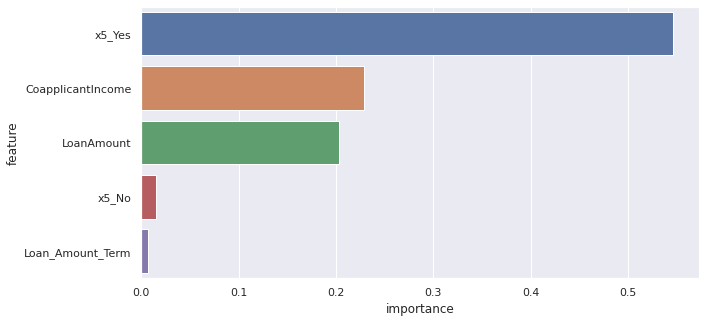

In [49]:
feat_df = pd.DataFrame()
feat_df['feature'] = X_train.columns
feat_df['importance'] = clf_grid.best_estimator_.feature_importances_
feat_df = feat_df.sort_values('importance', ascending=False)
sns.barplot(y=feat_df['feature'], 
            x=feat_df['importance'])

## <span style="color:blue">Model Results</span>
<hr>

``It can be observed that the Bagging with Random Forest algorithm performed better to classify the test dataset. It has performed well in all the metrics as compared with Support Vector Algorithm. Both SVM and Bagging with Random Forest recieved the same dataset from the feature selection acomplished with RFECV. The SVM algorithm was used to classify data using hyperplanes while the Bagging (Random Forest) uses multiple decision trees. Below is a table representing the summary of their metrics.`` 

| Algorithm | Precision | Recall | F1-Score | Accuracy |
|-----------|----------|----------|----------|----------|
| Support Vector Machine      | 73.47%     | 84.71%     | 78.69%     | 68.29%     |
| Bagging (Random Forest)      | 81.19%     | 96.47%     | 88.17%     | 82.11%     |


## <span style="color:blue">Model Interpretability</span>
<hr>

``The important features from the best model is utilized with SHAP global explainability to interpret the overall contribution of the features. The top three features are highlighted.``

In [52]:
import shap

/opt/python/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
X_test.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'x5_Yes',
       'x5_No'],
      dtype='object')

In [54]:
explainer = shap.KernelExplainer(clf_grid.best_estimator_.predict, shap.sample(X_train))
shap_values = explainer.shap_values(X_test.iloc[:,:])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  0%|                                                                                                                                                                                                     | 0/123 [00:00<?, ?it/s]X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  2%|███                                                                                                                                                                                          | 2/123 [00:00<00:11, 10.14it/s]X does not have valid feature names, but RandomForestClassifier was fitted wit

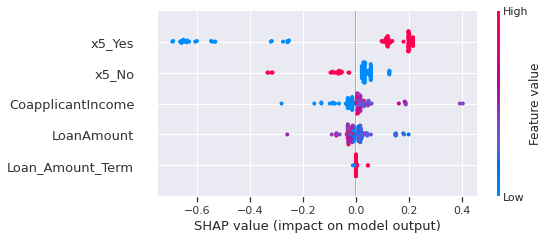

In [58]:
shap.summary_plot(shap_values, X_test.iloc[:,:])

``It can be inferred that the top features has a significant impact for the loan status to be approved. The loan will be approved if the features above are observed considering where the low and high values are situated in the SHAP value axis.``

``Interpretation: Having a credit history deems to provide more availability of having a loan even if there are less co-applicant income per loan. Also if the loan amount is lesser it is deemed to be approved.``

## <span style="color:blue">Recommendation</span>
<hr>

``Other improvements such as the use of other algorithms to speed up some processes are suggested. Algorithms such as hyperopt or optuna can help in speeding the process of feature selection with cross validation. It is commonly the RFECV and sometimes the actual machine algorithm that runs slower with increasing dataset size. Since both linear, logistic, and KNN algorithms were not explored, future analysis could include the results of metric from these algortihms. Neural networks can also be explored as they are helpful for unlabaled data.`` 

``Other improvements can also be done by increasing the number of iterations and cross validation splits or folds for optimizing the outgoing metric results that will be the ultimate basis of model selection until it will be deployed for usage.``